Importing nessesary packages

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pprint

First we will load the D31 dataset

In [42]:
data = []
file = open("./data/D31.txt")
for line in file:
    data_point = line.split()
    for i in range(0, len(data_point)):
        data_point[i] = float(data_point[i])
    data_point_rounded = np.round(data_point, 1)
    data.append(data_point_rounded[:-1])


Let's visualize the dataset

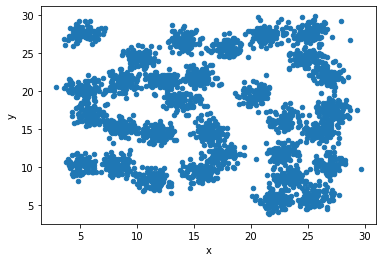

In [43]:
df = pd.DataFrame(data, columns=['x', 'y'])
ax1 = df.plot.scatter(x='x',
                     y='y')
plt.show()

In [48]:
# function to calculate euclidian distance
def calculate_euc_distance(vector1, vector2):
    return np.linalg.norm(vector1 - vector2)

# function to calculate manhatten distance. used to get closest neigours
def man_distance(node1_row, node1_col, node2_row, node2_col):
  return np.abs(node1_row-node2_row) + np.abs(node1_col-node2_col)

def winning_node(rows, cols, data, data_index):
    node = (0,0)
    smallest_dist = 1000000
    for i in range(rows):
        for j in range(cols):
            euc_dist = calculate_euc_distance(map[i][j], data[data_index])
            if euc_dist < smallest_dist:
                smallest_dist = euc_dist
                node = (i, j)
    return node

ValueError: Must pass 2-d input. shape=(2, 5, 1)

In [ ]:
# define SOM row and col size
Rows = 10
Cols = 10
# create a 10x10 SOM with 2D nodes with a random value between 0-1
map = np.random.random_sample(size=(Rows,Cols,2))


Train the network

In [ ]:
epochs = 100